# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#obeservations
#1.latitude and humidity does not seem to have a relationship with cloudiness. This is true for both hemispheres
#2. Temperature is stronly correlated with latitude. the close we get to latitude =0 (equator), the higher the temperature
#3. Wind speed is somewhat related to latitude. it increases slightly as the latitude moves away from equator.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#create an empty list to store API Data
City_Name = []
Lat = []
Lng = []
Max_temp = []
Humidity = []
Cloudiness = []
Wind_speed = []
Country = []
Date = []

# Start the log counter 
Number_counter=0
Set_counter=1



print("Beginning Data Retrieval")
print("-------------------------------")

#loop through cities to add to list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        City_Name.append(response["name"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Record = response["name"]
        if Number_counter==50:
            Number_counter=0
            Set_counter+=1
        Number_counter+=1
            
        print(f"Processing Record {Number_counter} of set {Set_counter} | {Record}")
    
        time.sleep(2.00)
    

    # If no record found go to the next one
    except:
        print("City not found. Skipping...")
    continue
    
print("-------------------------------")
print("Data Retrival Complete")



Beginning Data Retrieval
-------------------------------
Processing Record 1 of set 1 | Bluff
Processing Record 2 of set 1 | Belaya Kholunitsa
Processing Record 3 of set 1 | Kapaa
Processing Record 4 of set 1 | Vestmannaeyjar
Processing Record 5 of set 1 | Vaini
Processing Record 6 of set 1 | Kaitangata
City not found. Skipping...
Processing Record 7 of set 1 | Haines Junction
Processing Record 8 of set 1 | Poum
Processing Record 9 of set 1 | Severo-Kuril'sk
Processing Record 10 of set 1 | Castro
Processing Record 11 of set 1 | Hilo
Processing Record 12 of set 1 | Dikson
Processing Record 13 of set 1 | Weyburn
Processing Record 14 of set 1 | Puerto Ayora
Processing Record 15 of set 1 | Alamosa
Processing Record 16 of set 1 | Zinder
Processing Record 17 of set 1 | Mataura
Processing Record 18 of set 1 | Lappeenranta
Processing Record 19 of set 1 | Hermanus
City not found. Skipping...
Processing Record 20 of set 1 | Vila do Maio
Processing Record 21 of set 1 | Bredasdorp
Processing Recor

Processing Record 38 of set 4 | Zhanakorgan
Processing Record 39 of set 4 | Kerrville
Processing Record 40 of set 4 | Sioux Lookout
Processing Record 41 of set 4 | Geraldton
Processing Record 42 of set 4 | Terrace
Processing Record 43 of set 4 | Hofn
Processing Record 44 of set 4 | La Santisima Trinidad
Processing Record 45 of set 4 | San Andrés
Processing Record 46 of set 4 | Mattoon
Processing Record 47 of set 4 | Acqui Terme
Processing Record 48 of set 4 | Caucayá
City not found. Skipping...
Processing Record 49 of set 4 | Mahébourg
Processing Record 50 of set 4 | Gáldar
Processing Record 1 of set 5 | Genhe
Processing Record 2 of set 5 | Katangli
Processing Record 3 of set 5 | Tătărani
City not found. Skipping...
Processing Record 4 of set 5 | Lieksa
Processing Record 5 of set 5 | Warrington
Processing Record 6 of set 5 | Dunedin
Processing Record 7 of set 5 | Rocha
Processing Record 8 of set 5 | Honningsvåg
Processing Record 9 of set 5 | Nouadhibou
Processing Record 10 of set 5 | N

Processing Record 30 of set 8 | Mattru
Processing Record 31 of set 8 | Mayo
Processing Record 32 of set 8 | Narsaq
Processing Record 33 of set 8 | Weligama
Processing Record 34 of set 8 | Erenhot
Processing Record 35 of set 8 | Samarai
City not found. Skipping...
Processing Record 36 of set 8 | Bilibino
Processing Record 37 of set 8 | Vostok
Processing Record 38 of set 8 | Orbetello
Processing Record 39 of set 8 | Katghora
Processing Record 40 of set 8 | Xinyu
Processing Record 41 of set 8 | Kavieng
Processing Record 42 of set 8 | General Roca
Processing Record 43 of set 8 | Altamira
Processing Record 44 of set 8 | Ugoofaaru
Processing Record 45 of set 8 | Novozaimka
Processing Record 46 of set 8 | Nānākuli
Processing Record 47 of set 8 | Lebedinyy
Processing Record 48 of set 8 | Shakiso
Processing Record 49 of set 8 | Nome
City not found. Skipping...
Processing Record 50 of set 8 | Fairbanks
City not found. Skipping...
Processing Record 1 of set 9 | Kimbe
Processing Record 2 of set 9 

Processing Record 16 of set 12 | Awjilah
Processing Record 17 of set 12 | Beyneu
Processing Record 18 of set 12 | Kareli
Processing Record 19 of set 12 | Vanimo
Processing Record 20 of set 12 | Lüderitz
Processing Record 21 of set 12 | Ouésso
Processing Record 22 of set 12 | Malinyi
Processing Record 23 of set 12 | Kawalu
Processing Record 24 of set 12 | Kilindoni
Processing Record 25 of set 12 | Hūn
Processing Record 26 of set 12 | Talcahuano
Processing Record 27 of set 12 | Dekar
City not found. Skipping...
Processing Record 28 of set 12 | Hastings
Processing Record 29 of set 12 | Ponta Delgada
Processing Record 30 of set 12 | Chiria
Processing Record 31 of set 12 | Tyazhinskiy
Processing Record 32 of set 12 | Salinas
Processing Record 33 of set 12 | Viedma
Processing Record 34 of set 12 | Salina Cruz
Processing Record 35 of set 12 | Khani
City not found. Skipping...
Processing Record 36 of set 12 | Bahía Blanca
-------------------------------
Data Retrival Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather={"City":City_Name,
         "Lat":Lat,
         "Lng":Lng,
         "Max Temp":Max_temp,
         "Humidity":Humidity,
         "Cloudiness":Cloudiness,
         "Wind Speed":Wind_speed,
          "Country":Country,
         "Date":Date}

weather_df=pd.DataFrame(weather)
print(weather_df.count())
weather_df.head()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,39.00,83,3,3.00,NZ,1592485233
1,Belaya Kholunitsa,58.84,50.85,65.62,38,0,6.64,RU,1592485255
2,Kapaa,22.08,-159.32,77.00,83,20,17.22,US,1592485202
3,Vestmannaeyjar,63.44,-20.27,51.80,71,40,23.04,IS,1592485259
4,Vaini,-21.20,-175.20,68.00,94,75,8.05,TO,1592485156


In [6]:
weather_df.to_csv('Output/weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidity =weather_df.loc[weather_df["Humidity"] > 100, :]
humidity
#no country with humidity over 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

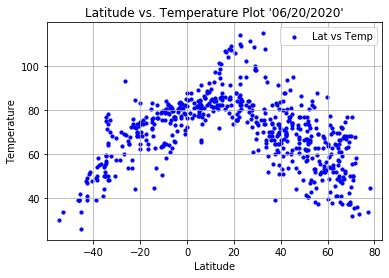

In [8]:
lattitude=weather_df["Lat"]
temperature=weather_df["Max Temp"]
plt.scatter(lattitude,temperature,marker="o",color="b",s=10,label="Lat vs Temp")
plt.grid(True)
plt.title("Latitude vs. Temperature Plot '06/20/2020'")
plt.legend(loc="upper right")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(temperature)-5,max(temperature)+5)
plt.savefig("Weather_Output_PNG/Latitude_vs._Temperature_Plot.PNG")
plt.show()

#this graph checks wether there's a relationship between latitutde the temperature.
#if there's posititve correlation, it means the higher the lattitude, the higher the max temperature of the city. 
# if there's negative correlation, it means the higher the lattitude, the lower the max temperature of the city. otherwise there's no relationship.


## Latitude vs. Humidity Plot

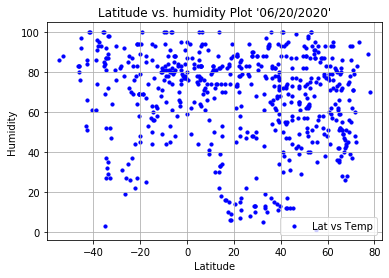

In [9]:

lattitude=weather_df["Lat"]
humidity=weather_df["Humidity"]
plt.scatter(lattitude,humidity,marker="o",color="b",s=10,label="Lat vs Temp")
plt.grid(True)
plt.title("Latitude vs. humidity Plot '06/20/2020'")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(humidity)-5,max(humidity)+5)
plt.savefig("Weather_Output_PNG/Latitude_vs._Humidity.PNG")
plt.show()
#this graph checks wether there's a relationship between latitutde the humidity
#if there's posititve correlation, it means the higher the lattitude, the higher the humidity of the city. 
# if there's negative correlation, it means the higher the lattitude, the lower the humidity of the city. otherwise there's no relationship.


## Latitude vs. Cloudiness Plot

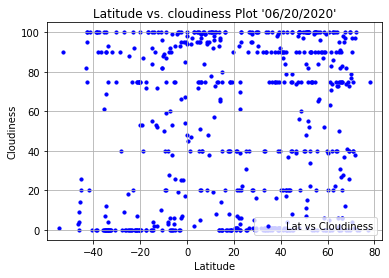

In [10]:
lattitude=weather_df["Lat"]
cloudiness=weather_df["Cloudiness"]
plt.scatter(lattitude,cloudiness,marker="o",color="b",s=10,label="Lat vs Cloudiness")
plt.grid(True)
plt.title("Latitude vs. cloudiness Plot '06/20/2020'")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(cloudiness)-5,max(cloudiness)+5)
plt.savefig("Weather_Output_PNG/Latitude_vs._Cloudiness.PNG")
plt.show()
#this graph checks wether there's a relationship between latitutde the cloudiness
#if there's posititve correlation, it means the higher the lattitude, the higher the cloudiness of the city. 
# if there's negative correlation, it means the higher the lattitude, the lower the cloudiness of the city. otherwise there's no relationship.



## Latitude vs. Wind Speed Plot

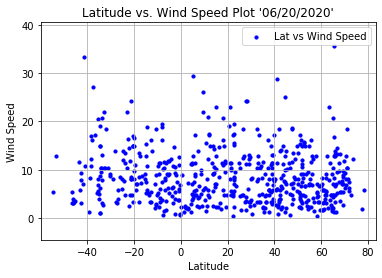

In [11]:
lattitude=weather_df["Lat"]
wind_speed=weather_df["Wind Speed"]
plt.scatter(lattitude,wind_speed,marker="o",color="b",s=10,label="Lat vs Wind Speed")
plt.grid(True)
plt.title("Latitude vs. Wind Speed Plot '06/20/2020'")
plt.legend(loc="upper right")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(wind_speed)-5,max(wind_speed)+5)
plt.savefig("Weather_Output_PNG/Latitude_vs._Wind_Speed_Plot.PNG")
plt.show()
#this graph checks wether there's a relationship between latitutde the Wind Speed
#if there's posititve correlation, it means the higher the lattitude, the higher the Wind Speed of the city. 
# if there's negative correlation, it means the higher the lattitude, the lower the Wind Speed of the city. otherwise there's no relationship.



## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
Northern =weather_df.loc[weather_df["Lat"]>=0,:]
Southern=weather_df.loc[weather_df["Lat"]<0, :]
Northern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Belaya Kholunitsa,58.84,50.85,65.62,38,0,6.64,RU,1592485255
2,Kapaa,22.08,-159.32,77.00,83,20,17.22,US,1592485202
3,Vestmannaeyjar,63.44,-20.27,51.80,71,40,23.04,IS,1592485259
6,Haines Junction,60.75,-137.51,48.40,76,100,1.63,CA,1592485217
8,Severo-Kuril'sk,50.68,156.12,41.58,88,48,5.28,RU,1592485270
...,...,...,...,...,...,...,...,...,...
579,Chiria,22.30,85.27,79.54,78,93,4.61,IN,1592486346
580,Tyazhinskiy,56.12,88.52,62.62,90,100,6.91,RU,1592486488
581,Salinas,36.68,-121.66,55.40,66,1,6.93,US,1592486233
583,Salina Cruz,16.17,-95.20,80.22,74,100,8.57,MX,1592486351


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

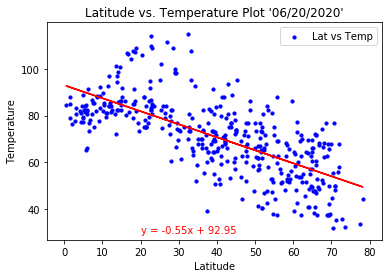

The R squared is 0.48042563849122866


In [14]:
lattitude=Northern["Lat"]
temperature=Northern["Max Temp"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, temperature)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,temperature,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Temperature Plot '06/20/2020'")
plt.annotate(line_equation,(20,30),fontsize=10,color="red")
plt.legend(loc="upper right")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(temperature)-5,max(temperature)+5)
plt.savefig("Weather_Output_PNG/Northern_Latitude_vs._Temperature_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")
#lattitude is correlated with Temperature. the higher the tempature the further we move away from equator

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

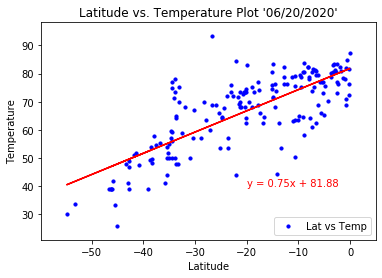

The R squared is 0.588029050004419


In [16]:
lattitude=Southern["Lat"]
temperature=Southern["Max Temp"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, temperature)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,temperature,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Temperature Plot '06/20/2020'")
plt.annotate(line_equation,(-20,40),fontsize=10,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(temperature)-5,max(temperature)+5)
plt.savefig("Weather_Output_PNG/Southern_Latitude_vs._Temperature_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")
#lattitude is correlated with Temperature. the higher the tempature the closer we are to equator

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

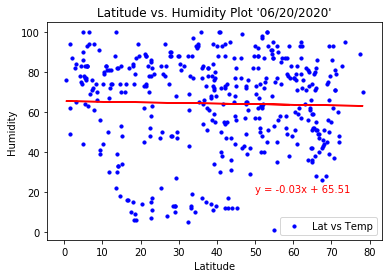

The R squared is 0.0006743750145763592


In [18]:
lattitude=Northern["Lat"]
humidity=Northern["Humidity"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, humidity)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,humidity,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Humidity Plot '06/20/2020'")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(humidity)-5,max(humidity)+5)
plt.annotate(line_equation,(50,20),fontsize=10,color="red")
plt.savefig("Weather_Output_PNG/Northern_Latitude_vs._Humidity_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")
#humidity doesnt seem to be realted with latitude

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

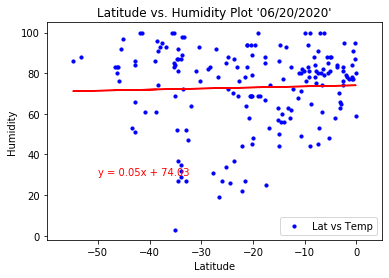

The R squared is 0.0013282171840336254


In [20]:
lattitude=Southern["Lat"]
humidity=Southern["Humidity"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, humidity)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,humidity,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Humidity Plot '06/20/2020'")
plt.annotate(line_equation,(-50,30),fontsize=10,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(humidity)-5,max(humidity)+5)
plt.savefig("Weather_Output_PNG/Southern_Latitude_vs._Humidity_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")
#humidity doesnt seem to be realted with latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

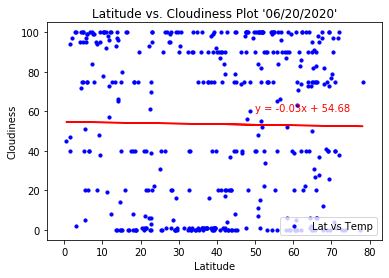

The R squared is 0.00022749245305365786


In [21]:
lattitude=Northern["Lat"]
cloudiness=Northern["Cloudiness"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, cloudiness)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,cloudiness,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Cloudiness Plot '06/20/2020'")
plt.annotate(line_equation,(50,60),fontsize=10,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(cloudiness)-5,max(cloudiness)+5)
plt.savefig("Weather_Output_PNG/Northern_Latitude_vs._Cloudiness_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")
#cloudiness doesn't seem to be realted with latitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

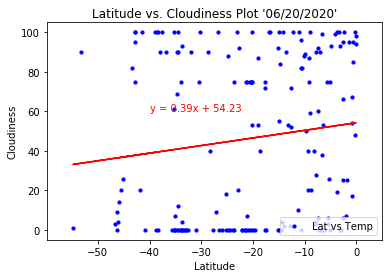

The R squared is 0.01669608841504762


In [22]:
lattitude=Southern["Lat"]
cloudiness=Southern["Cloudiness"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, cloudiness)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,cloudiness,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Cloudiness Plot '06/20/2020'")
plt.annotate(line_equation,(-40,60),fontsize=10,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(cloudiness)-5,max(cloudiness)+5)
plt.savefig("Weather_Output_PNG/Souththern_Latitude_vs._Cloudiness_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")
#cloudiness doesn't seem to be realted with latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

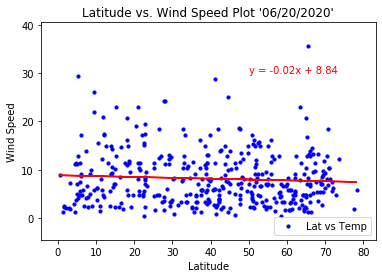

The R squared is 0.004390508981666464


In [23]:
lattitude=Northern["Lat"]
wind_speed=Northern["Wind Speed"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, wind_speed)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,wind_speed,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Wind Speed Plot '06/20/2020'")
plt.annotate(line_equation,(50,30),fontsize=10,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(wind_speed)-5,max(wind_speed)+5)
plt.savefig("Weather_Output_PNG/Northern_Latitude_vs._Wind_Speed_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")
#wind speed slightly decrease as we move away from equator

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

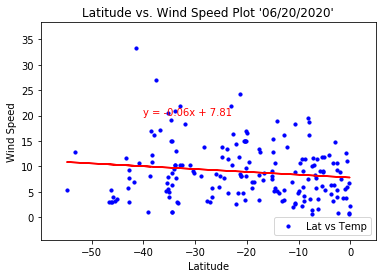

The R squared is 0.019177333216729018


In [24]:
lattitude=Southern["Lat"]
wind_speed=Southern["Wind Speed"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, wind_speed)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,wind_speed,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Wind Speed Plot '06/20/2020'")
plt.annotate(line_equation,(-40,20),fontsize=10,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(wind_speed)-5,max(wind_speed)+5)
plt.savefig("Weather_Output_PNG/Southern_Latitude_vs._Wind_Speed_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")
#wind speed slightly increase as we move closer to